In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading dataset
df = pd.read_csv("Housing.csv")

In [ ]:
# 1. Data Preprocessing
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [18]:
# 2. Feature Selection
X = df.drop('price', axis=1)  # Features
y = df['price']              # Target


In [19]:
# 3. Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Model Training (Simple Linear Regression (using 'area' only))
model_simple = LinearRegression()
model_simple.fit(X_train[['area']], y_train)
y_pred_simple = model_simple.predict(X_test[['area']])

In [21]:
# Multiple Linear Regression (all features)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)


In [22]:
# 5. Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print(f"MAE: ${mean_absolute_error(y_true, y_pred):,.2f}")
    print(f"MSE: ${mean_squared_error(y_true, y_pred):,.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    
evaluate_model(y_test, y_pred_simple, "Simple Linear Regression (Area Only)")
evaluate_model(y_test, y_pred_multi, "Multiple Linear Regression (All Features)")


Simple Linear Regression (Area Only) Evaluation:
MAE: $1,474,748.13
MSE: $3,675,286,604,768.19
R² Score: 0.2729

Multiple Linear Regression (All Features) Evaluation:
MAE: $970,043.40
MSE: $1,754,318,687,330.66
R² Score: 0.6529


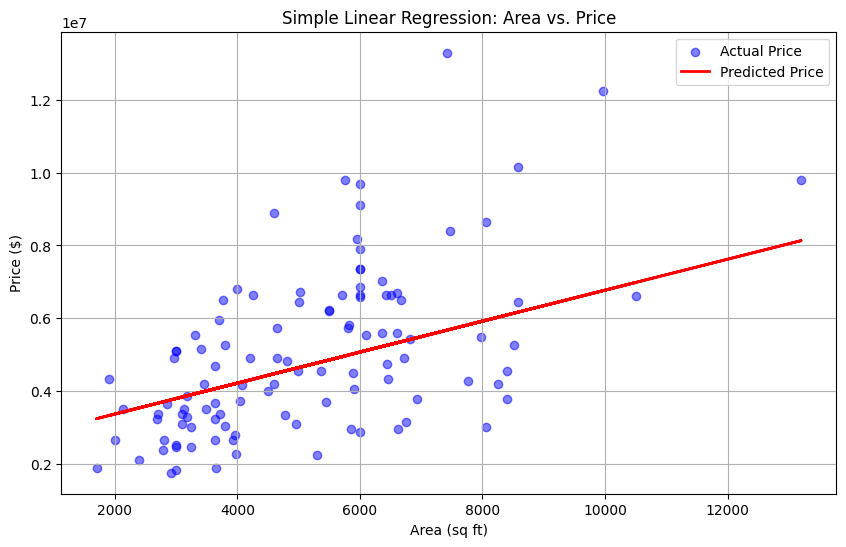

In [23]:
# 6. Visualization
# A. Simple Regression Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], y_test, color='blue', alpha=0.5, label='Actual Price')
plt.plot(X_test['area'], y_pred_simple, color='red', linewidth=2, label='Predicted Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Simple Linear Regression: Area vs. Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# B. Feature Coefficients (Multiple Regression)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Impact ($)': model_multi.coef_
}).sort_values(by='Impact ($)', ascending=False)

print("\nFeature Impact on Price (Multiple Regression):")
print(coefficients.to_string(index=False))



Feature Impact on Price (Multiple Regression):
                        Feature    Impact ($)
                      bathrooms  1.094445e+06
                airconditioning  7.914267e+05
                hotwaterheating  6.846499e+05
                       prefarea  6.298906e+05
                        stories  4.074766e+05
                       basement  3.902512e+05
                       mainroad  3.679199e+05
                      guestroom  2.316100e+05
                        parking  2.248419e+05
                       bedrooms  7.677870e+04
                           area  2.359688e+02
furnishingstatus_semi-furnished -1.268818e+05
   furnishingstatus_unfurnished -4.136451e+05


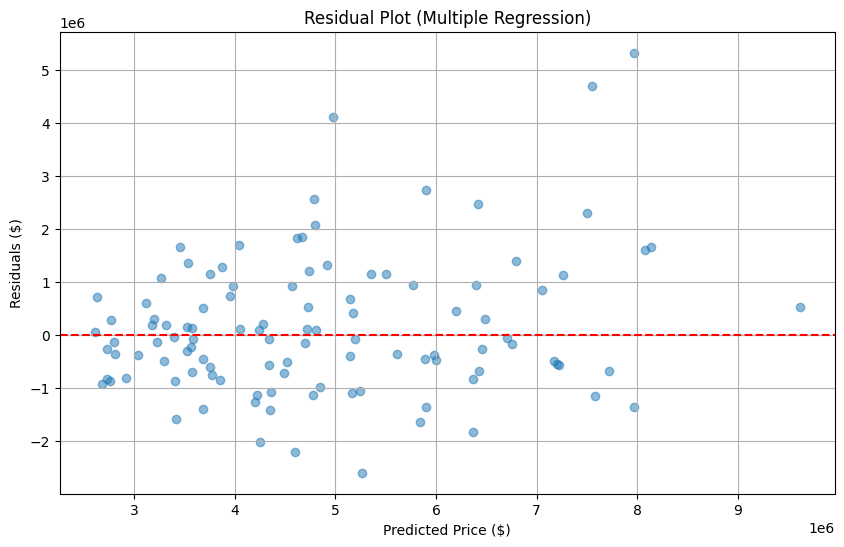

In [ ]:
# C. Residual Plot 
residuals = y_test - y_pred_multi
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot (Multiple Regression)')
plt.grid(True)
plt.show()